In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import interpolate

In [2]:
def read_cl():
    l = np.loadtxt('../data/Cell_data-f1z1f1z1.dat', usecols=(0))
    l = np.append(np.array([0.0,1.0]), l[:8191])
    #l = np.append(np.array([0.0,1.0]), l[:1000]).astype(int)
    cl = np.loadtxt('../data/Cell_data-f1z1f1z1.dat', usecols=(1))
    cl = np.append(np.array([0.0,0.0]), cl[:8191])
    #cl = np.append(np.array([0.0,0.0]), cl[:1000])
    return l, cl

l , cl = read_cl()

In [3]:
# Theoretical angular correlation function (using formula with Legendre polynomials)
def w_theta(theta):
    x = np.cos(theta)
    coeff = (2*l+1)/(4*np.pi)*cl
    w = np.polynomial.legendre.legval(x, coeff)
    return w     

In [4]:
theta_arr = np.linspace(0,2*0.032,50)

theta_arr

array([0.        , 0.00130612, 0.00261224, 0.00391837, 0.00522449,
       0.00653061, 0.00783673, 0.00914286, 0.01044898, 0.0117551 ,
       0.01306122, 0.01436735, 0.01567347, 0.01697959, 0.01828571,
       0.01959184, 0.02089796, 0.02220408, 0.0235102 , 0.02481633,
       0.02612245, 0.02742857, 0.02873469, 0.03004082, 0.03134694,
       0.03265306, 0.03395918, 0.03526531, 0.03657143, 0.03787755,
       0.03918367, 0.0404898 , 0.04179592, 0.04310204, 0.04440816,
       0.04571429, 0.04702041, 0.04832653, 0.04963265, 0.05093878,
       0.0522449 , 0.05355102, 0.05485714, 0.05616327, 0.05746939,
       0.05877551, 0.06008163, 0.06138776, 0.06269388, 0.064     ])

In [5]:
w_theta_arr = w_theta(theta_arr)

w_theta_arr

array([0.6879292 , 0.12677571, 0.07392433, 0.05275729, 0.04215442,
       0.03664851, 0.03144967, 0.02684146, 0.02397847, 0.02152161,
       0.01884988, 0.01689328, 0.01547719, 0.01384818, 0.01239997,
       0.01144466, 0.01044466, 0.00936739, 0.00862839, 0.00800316,
       0.00722957, 0.00661123, 0.00619056, 0.00566471, 0.00514325,
       0.00481878, 0.00447941, 0.00405931, 0.00377365, 0.00355627,
       0.00324356, 0.00297849, 0.00282507, 0.00261378, 0.00237551,
       0.00224395, 0.00211359, 0.00191721, 0.00178625, 0.00170719,
       0.00156397, 0.00143164, 0.00137413, 0.00128444, 0.00116131,
       0.00110379, 0.00105642, 0.00095653, 0.00089014, 0.00086684])

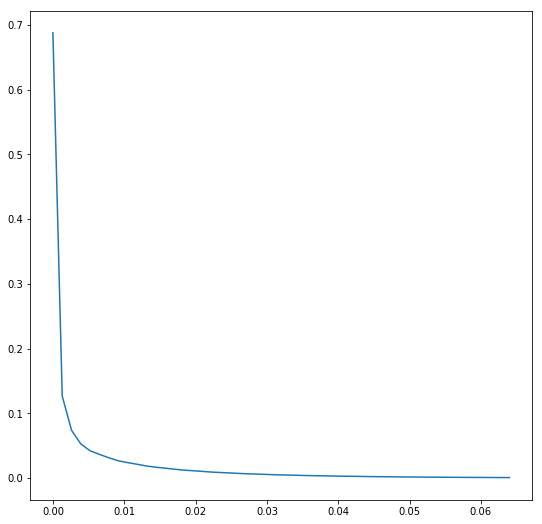

In [6]:
plt.figure(figsize=(9,9))
plt.plot(theta_arr, w_theta_arr)
#plt.xscale("log", nonposx='clip')

In [7]:
w_theta_interp = interpolate.interp1d(theta_arr, w_theta_arr)

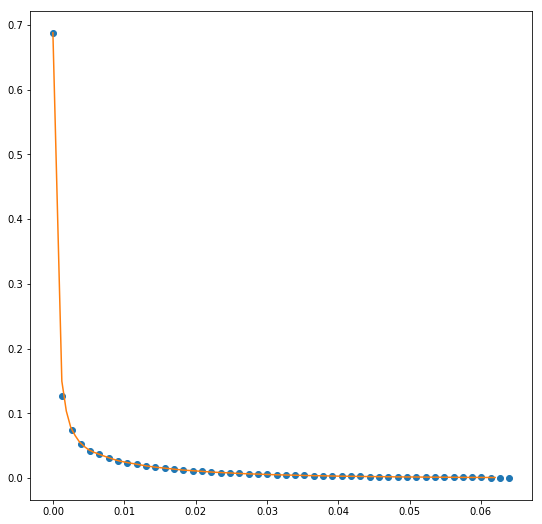

In [8]:
theta_new =  np.linspace(0,2*0.031,100)
w_theta_new = w_theta_interp(theta_new)   # use interpolation function returned by `interp1d`
plt.figure(figsize=(9,9))
plt.plot(theta_arr, w_theta_arr, 'o', theta_new, w_theta_new, '-')

In [28]:
def angular_length(omega_1, omega_2):
    print(np.around( np.cos(omega_1[0])*np.cos(omega_2[0]) +  np.sin(omega_1[0])*np.sin(omega_2[0])*np.cos(omega_1[1]-omega_2[1]),
                    decimals = 20))
    return np.arccos( np.around( np.cos(omega_1[0])*np.cos(omega_2[0]) +  np.sin(omega_1[0])*np.sin(omega_2[0])*np.cos(omega_1[1]-omega_2[1]), decimals=20) )

In [29]:
t1 = [0.003, 0]
t2 = [2.1, 0.7]
t3 = [0.0155, 3.141592653589793]
t4 = [0.010936910628127367, 3.141592653589793]
t5 = [0.020063089371872633, 3.141592653589793]
t6 = [0.0155, 3.141592653589793]
t7 = [0.0312, 0.4]
t8 = [0.0309, 0.4]
tL = [0.0, 0.0] # location of patch -> at the north pole

t_patch_size = 0.031 # size of patch (in radians)
t_scale = 0.003 # scale we are interested (in radians)
log_shift = 1.0

print("Angular length between t1 and t2 (in radians) = ", angular_length(t1, t2))
print("Angular length between t1 and tL (in radians)  = ", angular_length(t1, tL))
print("Angular length between t2 and tL (in radians)  = ", angular_length(t2, tL))
print("Angular length between t3 and tL (in radians)  = ", angular_length(t3, tL))
print("Angular length between t4 and t6 (in radians)  = ", angular_length(t4, t6))
print("Angular length between t5 and t6 (in radians)  = ", angular_length(t5, t6))

-0.5028631789448581
Angular length between t1 and t2 (in radians) =  2.0977043840806666
0.999995500003375
Angular length between t1 and tL (in radians)  =  0.002999999999998294
-0.5048461045998576
Angular length between t2 and tL (in radians)  =  2.1
0.9998798774049833
Angular length between t3 and tL (in radians)  =  0.015500000000003036
0.9999895891257565
Angular length between t4 and t6 (in radians)  =  0.0045630893718851375
0.9999895891257565
Angular length between t5 and t6 (in radians)  =  0.0045630893718851375


In [11]:
t1 = [0.031, 0]
t2 = [0.031, 0]

print("Angular length between t1 and t2 (in radians) = ", angular_length(t1, t2))

Angular length between t1 and t2 (in radians) =  0.0


In [12]:
w_theta_interp(angular_length(t1, t1))

array(0.6879292)

In [13]:
w_theta_interp(0.0045630950164341245)

array(0.04752351)